# Import Libraries

In [1]:
!pip install aquarel

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager
import matplotlib
matplotlib.rcParams["font.sans-serif"] = ["Liberation Sans"]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from warnings import filterwarnings
filterwarnings("ignore")

from aquarel import load_theme

theme = load_theme("boxy_light")
theme.apply()

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score

# Load Data

In [3]:
data1 = pd.read_csv("cleaned/train_cleaned.csv")
test = pd.read_csv("cleaned/test_cleaned.csv")

# Encode Class

In [4]:
data_cleaner = [data1, test]

In [5]:
lc = LabelEncoder()
lc = lc.fit(data1['Credit_Score'])

for dataset in data_cleaner:
    dataset['Credit_Score'] = lc.transform(dataset['Credit_Score'])

# Train, Validation, Test data

In [6]:
X = data1.drop(columns=['Credit_Score']).values
y = data1['Credit_Score'].values

X_test = test.drop(columns=['Credit_Score']).values
y_test = test['Credit_Score'].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(102180, 36) (102180,)
(25545, 36) (25545,)
(20000, 36) (20000,)


# Modeling

## Machine Learning (Baseline)

In [7]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

## Deep Learning

In [8]:
print(X_train.shape)
print(f"Input shape: {X_train.shape[1]}")

(102180, 36)
Input shape: 36


In [20]:
# model = Sequential([
#     Dense(64, input_dim=X_train.shape[1], activation='relu'),
#     Dense(32, activation='relu'),
#     Dense(16, activation='relu'),
#     Dense(8, activation='relu'),
#     Dense(4, activation='relu'),
#     Dense(3, activation='softmax')
# ])

model = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(3, activation='softmax')                              # Output layer for 3 classes
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 256)                 │           9,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 119,427 (466.51 KB)

 Trainable params: 118,019 (461.01 KB)

 Non-trainable params: 1,408 (5.50 KB)

In [21]:
try:
    model.load_weights('model.keras')
except:
    print("No weights found")

No weights found


### No need to run if weights are already loaded

In [22]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=50, restore_best_weights=True)

In [23]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=1000,
                    batch_size=512,
                    callbacks=[early_stopping])

Epoch 1/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.5454 - loss: 1.0984 - val_accuracy: 0.6752 - val_loss: 0.7772
Epoch 2/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6565 - loss: 0.8161 - val_accuracy: 0.6843 - val_loss: 0.7580
Epoch 3/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6718 - loss: 0.7870 - val_accuracy: 0.6881 - val_loss: 0.7476
Epoch 4/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6848 - loss: 0.7657 - val_accuracy: 0.6918 - val_loss: 0.7403
Epoch 5/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6887 - loss: 0.7577 - val_accuracy: 0.6937 - val_loss: 0.7347
Epoch 6/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6895 - loss: 0.7538 - val_accuracy: 0.6965 - val_loss: 0.7308
Epoch 7/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6908 - loss: 0.7473 - val_accuracy: 0.6971 - val_loss: 0.7275
Epoch 8/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6946 - loss: 0.7414 

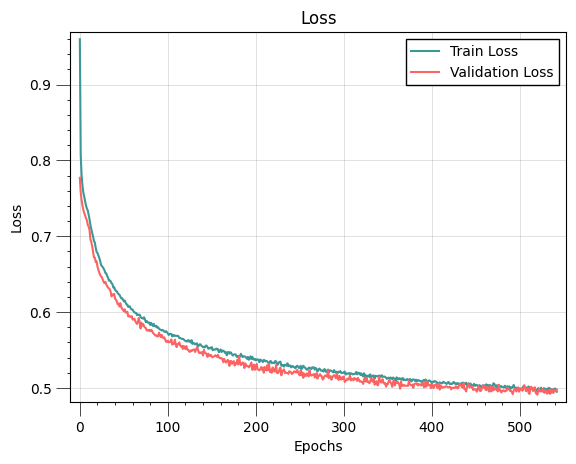

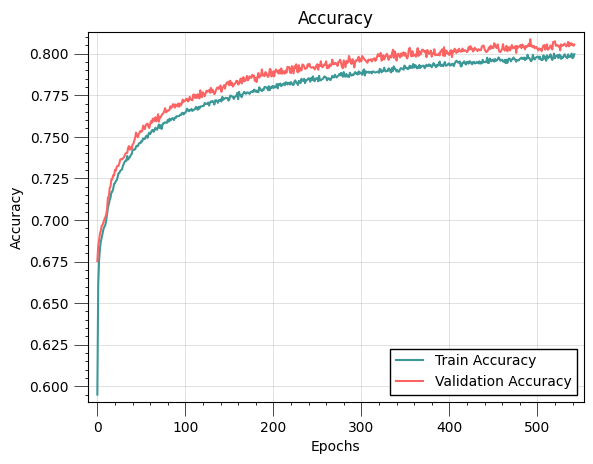

In [26]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
model.save('model.keras')

# Basline vs Deep Learning

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


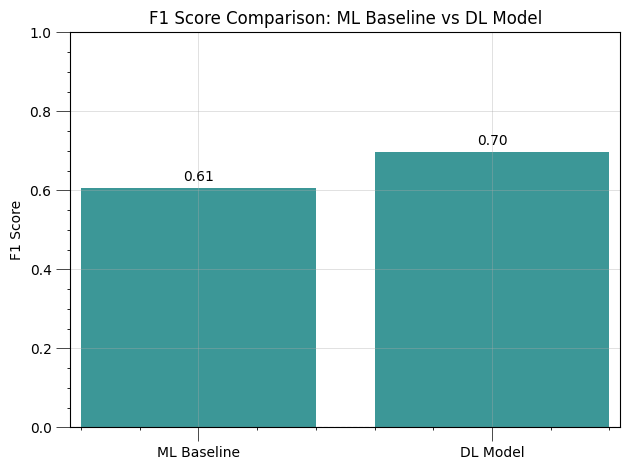

In [28]:
predictions_ml = logreg.predict(X_test)

predictions_dl = model.predict(X_test)
predictions_dl = np.argmax(predictions_dl, axis=1)

f1_ml = f1_score(y_test, predictions_ml, average='weighted')
f1_dl = f1_score(y_test, predictions_dl, average='weighted')

labels = ['ML Baseline', 'DL Model']
f1_scores = [f1_ml, f1_dl]

plt.bar(labels, f1_scores)

plt.ylabel('F1 Score')
plt.title('F1 Score Comparison: ML Baseline vs DL Model')

for i, score in enumerate(f1_scores):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center', va='bottom')

plt.ylim(0, 1)  # F1 scores range from 0 to 1
plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')
plt.tight_layout()
plt.show()

# Deep Learning Model Evaluation

In [29]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Accuracy:  0.6962


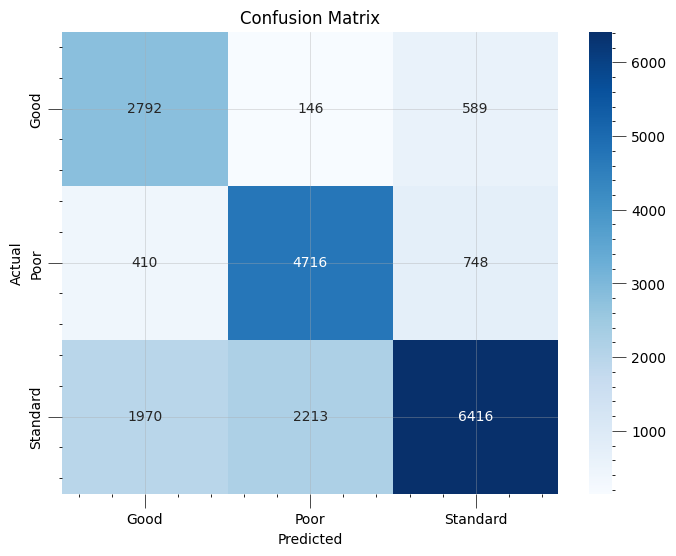

Classification Report:
               precision    recall  f1-score   support

        Good       0.54      0.79      0.64      3527
        Poor       0.67      0.80      0.73      5874
    Standard       0.83      0.61      0.70     10599

    accuracy                           0.70     20000
   macro avg       0.68      0.73      0.69     20000
weighted avg       0.73      0.70      0.70     20000

F1 Score (Macro): 0.6898414076868242
F1 Score (Weighted): 0.6976804148845377
Precision (Macro): 0.6779843055939176
Recall (Macro): 0.7332692620799027


In [30]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=lc.classes_, yticklabels=lc.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred, target_names=lc.classes_))

f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score (Macro): {f1_macro}")
print(f"F1 Score (Weighted): {f1_weighted}")

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print(f"Precision (Macro): {precision}")
print(f"Recall (Macro): {recall}")